**<span style="color:orange; font-size:18px;">About This Dataset:</span>**

- The **Auto MPG dataset** was originally published by the **U.S. Department of Energy** in **1983**

- It was originally included in the "StatLib" library at **Carnegie Mellon University**, and is now hosted on **Kaggle** and the **UCI Machine Learning Repository**

- The dataset was **compiled to investigate fuel efficiency trends** across various car models produced **between 1970 and 1982**

- It contains detailed **technical specifications of 398 car models, such as engine size, horsepower, and weight**

- The columns in this dataset are: **MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, Origin ***(1 = North America, 2 = Europe, 3 = Asia)***, and Car Name**

**Kaggle** Link: *https://www.kaggle.com/datasets/uciml/autompg-dataset*

**<span style="color:orange; font-size:18px;">Purpose of Analysis:</span>**

- Solve a **real-world engineering/forecasting problem** through regression

- **Construct a linear regression model** that can **accurately predict MPG of a vehicle**, when given other technical sepecifications (such as Weight)

- Gain extra practice performing **EDA, data-cleaning, visualization, and machine learning** using **scikit-learn, pandas, NumPy, and Matplotlib**

**Now, let's begin!**

**<span style="color:orange; font-size:18px;">Read in the required modules and change our default pandas settings:</span>**

In [1]:
#  Use the "try" flow control argument to "try" and import all necessary packages
try:
    # Basic operating system packages
    # 'os' - Provides functions for interacting with the operating system
    import os
    
    # Math and statistics packages
    # 'pandas' - Data manipulation and analysis library, renamed to 'pd'
    import pandas as pd
    # 'numpy' - Numerical computations library, renamed to 'np'
    import numpy as np
    
    # Graphing and visualization packages
    # 'matplotlib.pyplot' - Plotting graphs and figures, renamed to 'plt'
    import matplotlib.pyplot as plt
    # 'ticker' from 'matplotlib' - Provides tools to configure axis ticks
    import matplotlib.ticker as ticker
    # 'seaborn' - Statistical data visualization library, renamed to 'sns'
    import seaborn as sns

    # Machine Learning packages
    #  Import the "LinearRegression" algorithm from sklearn's .linear_model method, used to create Regression models
    from sklearn.linear_model import LinearRegression
    # 'train_test_split' - Splits data into training and testing subsets
    from sklearn.model_selection import train_test_split
    # OneHotEncoder allows us to dummy encode variables, storing them in a 'state' for inverse transformation upon final output
    from sklearn.preprocessing import OneHotEncoder
    # 'LabelEncoder' - Encodes categorical string labels as numerical values
    from sklearn.preprocessing import LabelEncoder
    # 'r2_score', 'mean_squared_error', and 'mean_absolute_error' - Metrics to evaluate regression model performance
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    
    # Print success message indicating successful imports
    print('All modules successfully imported.')
    
#  Use an "except" clause to catch specific import errors and rename the error to 'moderror'
except ModuleNotFoundError as moderror:
    print('Module failed to import: ' + str(moderror.name))

#  Use an "except" clause to catch any unexpected errors
except Exception as ex:
    print('Unexpected error occurred during imports: ' + str(ex))

All modules successfully imported.


In [2]:
#  Use the "try" flow control argument to "try" and adjust the display settings for pandas within the IDE
try:
    # Configure pandas display settings for better visibility of datasets within the IDE
    # 'display.max_columns' - Ensures all columns are displayed when printing DataFrames
    pd.set_option('display.max_columns', None)
    # 'display.width' - Sets the display width to accommodate large DataFrames without truncation
    pd.set_option('display.width', 2000)
    # 'display.max_rows' - Limits the number of rows displayed when printing DataFrames (useful for sampling)
    pd.set_option('display.max_rows', 50)
    # Disable scientific notation for better readability
    pd.set_option('display.float_format', '{:.2f}'.format)

    # Print success message indicating display settings were applied
    print('Display settings successfully applied.')

#  Use an "except" clause to catch if pandas ('pd') is not defined or imported incorrectly
except NameError:
    print('Error: Pandas (\'pd\') is not defined. Ensure that pandas is imported using: import pandas as pd.')

#  Use an "except" clause to catch if the provided 'pd.set_option()' settings are incorrect or invalid
except ValueError as valErr:
    print('Error: Invalid value provided to \'pd.set_option()\'. Details: ' + str(valErr))

#  Use an "except" clause to catch unexpected errors during the settings configuration process
except Exception as ex:
    print('Unexpected error occurred while configuring display settings: ' + str(ex))

Display settings successfully applied.


**<span style="color:red; font-size:18px;">Initialize our filepath variable and locate the dataset:</span>**

In [3]:
# Initialize our original file path
autoFilePath = r'C:\Users\jackn\Desktop\Projects\Portfolio\ML\auto-mpg.csv'

In [4]:
# Attempt to locate the dataset (using os.path.exists()) via the provided file path (located in the cell above)
if not os.path.exists(autoFilePath):
    # Print our our error message for our user if the file path is NOT found (concatenate our filePath variable to string)
    print('Error - the file at: ' + autoFilePath + ' was not found!')
    
# Otherwise, if our file is located
else:
    # Print our success message for user feedback
    print('Dataset successfully located.')

Dataset successfully located.


**<span style="color:red; font-size:18px;">Use pandas (and our file path variable) to read our file:</span>**

In [5]:
#  Use the "try" flow control argument to "try" and read our selected file
try:
    # Use pandas (alias = pd) to read our xlsx file, getting our automotive data. Then, store this data in a new variable (i.e., df)
    df = pd.read_csv(autoFilePath)
    # If the automotive dataset was located and successfully loaded, inform the user with a success message
    print('Automotive dataset is now sucessfully loaded.')

#  Otherwise, use an "except" clause to leave the "try" flow control argument. If there is an error, rename the error to 'fileError'
except FileNotFoundError as fileError:
    # Print out the error message for our user (a combo of string and our new exception variable 'ex')
    print('Error locating automotive data! File cannot be found at path: ' + str(fileError.filename))

Automotive dataset is now sucessfully loaded.


**<span style="color:Green; font-size:18px;">Now let's do some EDA and view the important characteristics of our dataset:</span>**

In [6]:
# Get the dataset's information using pandas' '.info()' function (shows columns, non-null counts, data types, and memory usage)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [7]:
# Use pandas' '.describe()' function to see descriptive statistics (mean, st.dev, min, max, and quartiles)
print(df.describe())

         mpg  cylinders  displacement  weight  acceleration  model year  origin
count 398.00     398.00        398.00  398.00        398.00      398.00  398.00
mean   23.51       5.45        193.43 2970.42         15.57       76.01    1.57
std     7.82       1.70        104.27  846.84          2.76        3.70    0.80
min     9.00       3.00         68.00 1613.00          8.00       70.00    1.00
25%    17.50       4.00        104.25 2223.75         13.83       73.00    1.00
50%    23.00       4.00        148.50 2803.50         15.50       76.00    1.00
75%    29.00       8.00        262.00 3608.00         17.18       79.00    2.00
max    46.60       8.00        455.00 5140.00         24.80       82.00    3.00


In [8]:
# Get a sum of all of the null values in each column, using pandas' '.isnull()' and '.sum()' functions
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [9]:
# View the FIRST five rows of our dataset
print('FIRST five rows of data: ' + '\n')
display(df.head())

# View the LAST five rows of our dataset
print('\n' + 'LAST five rows of data: ' + '\n')
display(df.tail())

FIRST five rows of data: 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino



LAST five rows of data: 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.00,4,140.00,86,2790,15.60,82,1,ford mustang gl
394,44.00,4,97.00,52,2130,24.60,82,2,vw pickup
395,32.00,4,135.00,84,2295,11.60,82,1,dodge rampage
396,28.00,4,120.00,79,2625,18.60,82,1,ford ranger
397,31.00,4,119.00,82,2720,19.40,82,1,chevy s-10


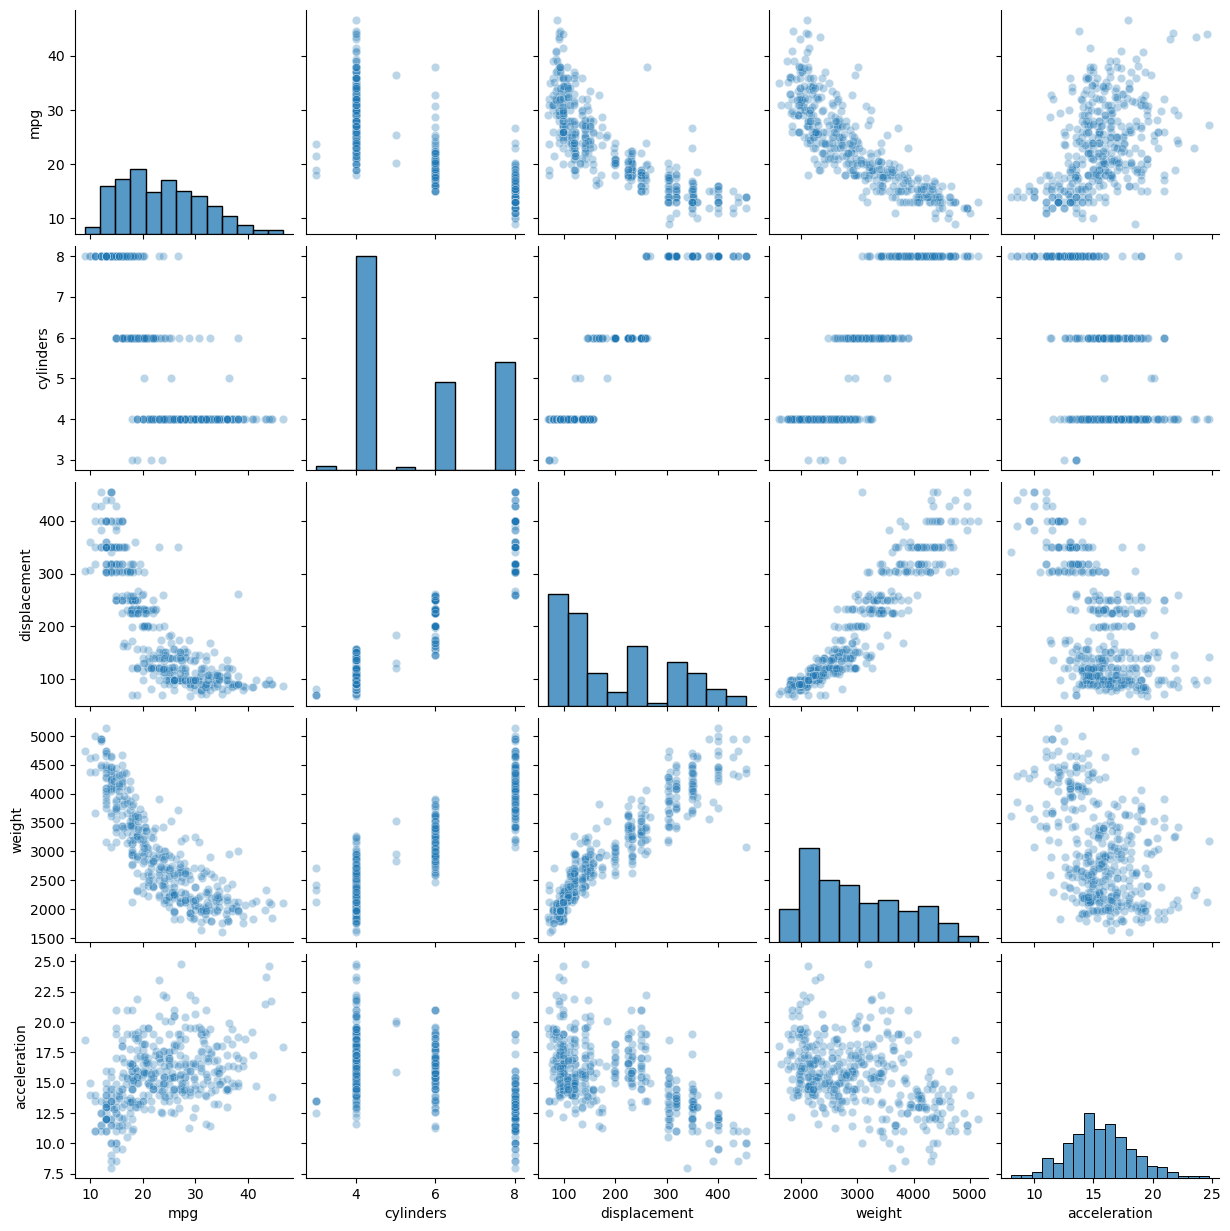

In [10]:
# Specify the data (columns) we want to include in the pairplot
pairPlot = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

# Generate a pairplot with 'hist' instead of 'kde' for diagonals
pairPlot = sns.pairplot(pairPlot, diag_kind='hist', plot_kws={'alpha': 0.3})

# Display the pairplot
plt.show()

**<span style="color:Green; font-size:18px;">Now it's time to pre-process our data:</span>**

- First, we should **make a copy of our data** in case of any unforseen issues

- Second, **in the original dataset, there are 6 values for horsepower that have a '?'** for their value **instead of an NaN** value - so we **need to handle them**

- Then, **remove any null (NaN) values** from the data

- Next, **define our feature and target variables**

- Lastly, **split the dataset into training and testing sets**

In [11]:
# Create a copy of the original dataframe to ensure we do not accidentally alter any data
autoData = df.copy()

In [12]:
# Filter out rows where the horsepower is unknown for the vehicles
autoData = autoData[autoData['horsepower'] != '?']

# Change the horsepower column from an 'object' to an 'int64' datatype
autoData['horsepower'] = autoData['horsepower'].astype('int64')

# Verify our datatype changes
autoData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [13]:
# Use the "try" flow control argument to "try" and remmove null values
try:
    # Print out how many rows there are before dropping for user-verification
    print('Before removing nulls, there are ' + str(autoData.shape[0]) + ' rows.' + '\n')

    # Drop null values (if any) from the dataset using the '.dropna()' function
    autoData = autoData.dropna()

    # Print out how many rows there are before dropping for user-verification
    print('After removing nulls, there are now ' + str(autoData.shape[0]) + ' rows left...')

    # Handle any errors ('Exceptions') that may occur during pre-processing, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('\n' + 'Error occurred during model evaluation: ' + str(ex))

Before removing nulls, there are 392 rows.

After removing nulls, there are now 392 rows left...


In [14]:
# Create a copy of the original dataframe to ensure we do not accidentally alter any data
df1 = autoData.copy()

# Display a verification print message for our user
print('autoData now copied and preserved, please use \'df1\' now for future cleaning/processing')

autoData now copied and preserved, please use 'df1' now for future cleaning/processing


In [15]:
# Use the "try" flow control argument to "try" and dummy encode the 'origin' column
try:
    # Initalize our dummy-encoder (with drop='first')
    encoder = OneHotEncoder(drop='first', sparse_output=False)

    # Fit and transform the values (in this case: 1, 2, and 3 - but dropping '1' aka the 'first') in the 'origin' column
    encoded = encoder.fit_transform(df1[['origin']])

    # Drop the original 'origin' column now
    df1 = df1.drop(columns='origin')

    # Create two new columns in df1 using column names generated by the '.get_feature_names_out' function (which returns 'origin_2', and 'origin_3') and assign them the values stored in 'encoded'
    df1[encoder.get_feature_names_out(['origin'])] = encoded

    # Print out the new column names for user-verification
    print('After creating dummies, the new columns in the dataset are:' + '\n' + '\n' + str(df1.columns))

# If either 'df1' or 'OneHotEncodere' is not defined,
except NameError as nameError:
    # Print a specific 'NameError' error message
    print('\n' + 'NameError: ' + str(nameError))

# Handle any errors ('Exceptions') that may occur during dummy encoding, storing them in our generic error variable 'ex'
except Exception as ex:
    print('\n' + 'Unexpected error occurred during data partitioning: ' + str(ex))

After creating dummies, the new columns in the dataset are:

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'car name', 'origin_2', 'origin_3'], dtype='object')


In [16]:
# Use the "try" flow control argument to "try" and partition the data into training and testing sets
try:
    # Ensure data is sorted in chronological order (oldest to newest)
    df1 = df1.sort_values(by='model year', ascending=True)

    # Prepare feature and target variables
    X = df1.drop(['mpg', 'car name'], axis=1)
    y = df1[['mpg']]

    # Use scikit-learn's 'train_test_split' function to partition/split the data into an 80% training and 20% testing split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Print a success message for our user
    print('The data was partitioned successfully.')

# If either 'df1' or 'train_test_split' is not defined,
except NameError as nameError:
    # Print a specific 'NameError' error message
    print('\n' + 'NameError: ' + str(nameError))

# Handle any errors ('Exceptions') that may occur during partitioning, storing them in our generic error variable 'ex'
except Exception as ex:
    print('\n' + 'Unexpected error occurred during data partitioning: ' + str(ex))

The data was partitioned successfully.


**<span style="color:Green; font-size:18px;">Now it's time to build our predictive model:</span>**

- First, **initialize and fit our linear model** to the now partitioned data

- Next, **make predictions on our training and testing data using the .predict() function**

- Then, **inspect our model's coefficients** to determine which are the most important variables for MPG predctitions

- Afterwards, **evaluate our model's performance with R², MSE, and graphing residual values**

- Finally, **reconstruct our original data structure** for final **.csv output**

In [17]:
# Use the "try" flow control argument to "try" to fit our model, generate our predictions, and evaluate it with MSE and R²
try:
    #  Create a variable to store the linear regression data in
    lm = LinearRegression()

    #  Fit the line to the training and testing partition data
    lm.fit(X_train, y_train)

    #  Make predictions on the training and testing sets with the '.predict()' function
    y_train_pred = lm.predict(X_train)
    y_test_pred = lm.predict(X_test)

    #  Store the R² values for each partition in a new variable "trainR2" or "testR2"
    trainR2 = r2_score(y_train, y_train_pred)
    testR2 = r2_score(y_test, y_test_pred)
    trainMSE = mean_squared_error(y_train, y_train_pred)
    testMSE = mean_squared_error(y_test, y_test_pred)
    testRMSE = np.sqrt(testMSE)

    #  Print the R² values for each, training and testing partitions
    print("Train R2 is: {}".format(round(trainR2, 2)))
    print("Test R2 is: {}\n".format(round(testR2, 2)))
    print("Train MSE is: {}".format(round(trainMSE, 4)))
    print("Test MSE is: {}".format(round(testMSE, 4)))
    print('\n' + "Test RMSE is: {} MPG — meaning that our predictions are on average, approximately {} MPG off.".format(round(testRMSE, 2), round(testRMSE, 2)))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('\n' + 'Error occurred during model evaluation: ' + str(ex))

Train R2 is: 0.81
Test R2 is: 0.86

Train MSE is: 11.2174
Test MSE is: 8.8632

Test RMSE is: 2.98 MPG — meaning that our predictions are on average, approximately 2.98 MPG off.


In [18]:
# Create a new dataframe using pandas' '.DataFrame()' function where,
# The newly created 'Feature' column will have the values of the features (X.columns) and the 'Coefficient' column will take on coefficient values (coef_.flatten()) of the model, sorted in descending order
coefficientDf = pd.DataFrame({'Feature': X.columns, 'Coefficient': lm.coef_.flatten()}).sort_values(by='Coefficient', ascending=False)

# Now, display the coefficients ('ccoefficientDf') for user readability
print(coefficientDf)

        Feature  Coefficient
7      origin_3         3.24
6      origin_2         2.72
5    model year         0.76
4  acceleration         0.07
1  displacement         0.03
3        weight        -0.01
2    horsepower        -0.03
0     cylinders        -0.54


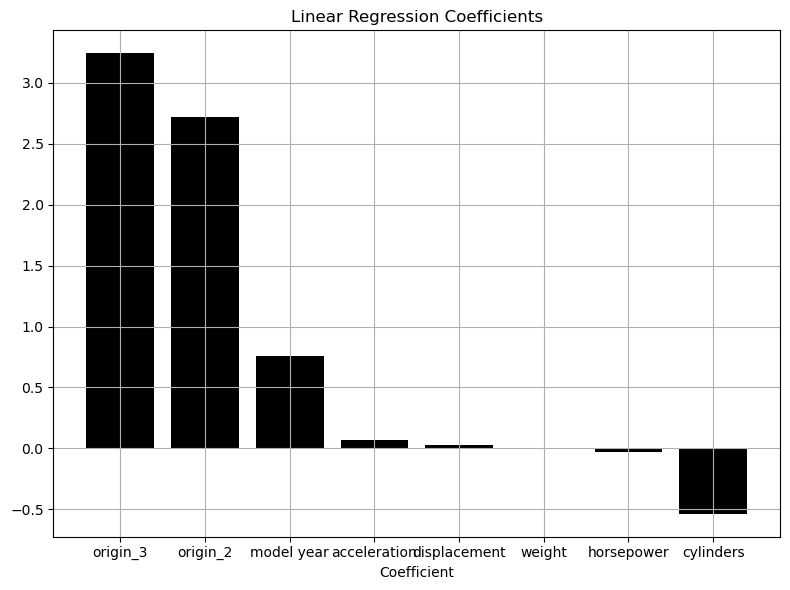

In [19]:
# Define our graph size with the '.figure(figsize=(x,y))' function
plt.figure(figsize=(8,6))

# Set the chart type to a bar chart with the '.bar()' function, with feature names on the x-axis and their coefficients on the y-axis
plt.bar(coefficientDf['Feature'], coefficientDf['Coefficient'], color='black')

# Set the x-axis label with the '.xlabel()' function to 'Coefficient Value'
plt.xlabel('Coefficient')

# Set the title of the graph with the '.title()' function to 'Linear Regression Coefficients'
plt.title('Linear Regression Coefficients')

# Enable a grid on the plot to improve readability with the '.grid(True)' function 
plt.grid(True)

# Use the '.tight_layout()' function to avoid overlap between labels or ticks
plt.tight_layout()

# Display the cofficients graph with the '.show()' function
plt.show()

In [20]:
# Create a copy of the original data to add our predictions to it
comparisonDf = autoData.copy()

# Create the new, blank column for Predicted MPG's
comparisonDf['Predicted MPG'] = None

# Decode the dummy-encoded 'origin_' columns
comparisonDf['origin'] = encoder.inverse_transform(df1[encoder.get_feature_names_out(['origin'])])

# Add the predictions to the original data but ONLY at the test indices
comparisonDf.loc[y_test.index, 'Predicted MPG'] = y_test_pred.flatten()

# Re-order all columns in the correct, logical order before our .csv output
comparisonDf = comparisonDf[['car name', 'model year', 'origin' , 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'mpg', 'Predicted MPG']]

# Rename the column headers to proper english naming-conventions
comparisonDf.columns = ['Car Name', 'Model Year', 'Origin', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Actual MPG', 'Predicted MPG']

# Now display the 'comparisonDf' for verification purposes
display(comparisonDf)

,Car Name,Model Year,Origin,Cylinders,Displacement,Horsepower,Weight,Acceleration,Actual MPG,Predicted MPG
0,chevrolet chevelle malibu,70,1,8,307.00,130,3504,12.00,18.00,None
1,buick skylark 320,70,1,8,350.00,165,3693,11.50,15.00,None
2,plymouth satellite,70,1,8,318.00,150,3436,11.00,18.00,None
3,amc rebel sst,70,1,8,304.00,150,3433,12.00,16.00,None
4,ford torino,70,1,8,302.00,140,3449,10.50,17.00,14.97
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,82,1,4,140.00,86,2790,15.60,27.00,None
394,vw pickup,82,1,4,97.00,52,2130,24.60,44.00,None
395,dodge rampage,82,1,4,135.00,84,2295,11.60,32.00,None
396,ford ranger,82,3,4,120.00,79,2625,18.60,28.00,None


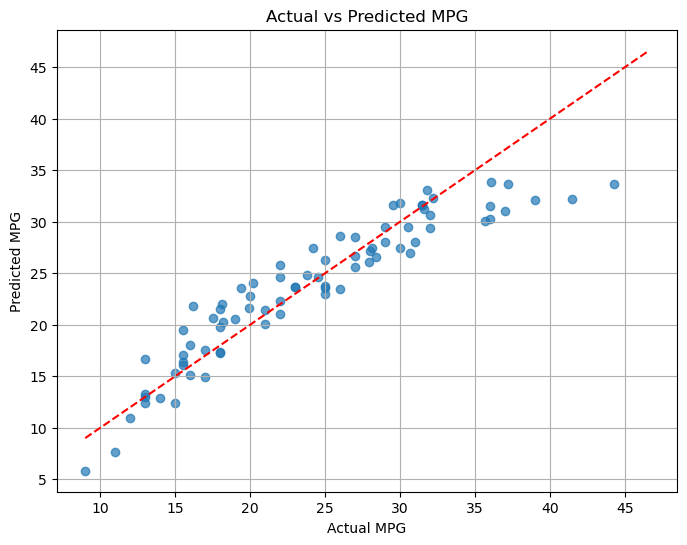

In [21]:
# Define our graph size with the '.figure(figsize=(x,y))' function
plt.figure(figsize=(8,6))

# Set the chart type to a scatterplot with the '.scatter()' function, to visualize the difference between actual (x-axis) vs predicted MPG values (y-axis)
plt.scatter(comparisonDf['Actual MPG'], comparisonDf['Predicted MPG'], alpha=0.7)

# Get the min and max of the actual MPGs to create our perfect predictions line
minMPG = comparisonDf['Actual MPG'].min()
maxMPG = comparisonDf['Actual MPG'].max()

# Plot a dashed, red, 45-degree line (going through (x, y), min/max coordinates) to represent a perfect prediction match between actual and predicted values by using the '.plot()' function
plt.plot([minMPG, maxMPG], [minMPG, maxMPG], color='red', linestyle='--')

# Set the x-axis label with the '.xlabel()' function to 'Coefficient Value'
plt.xlabel('Actual MPG')

# Set the y-axis label with the '.xlabel()' function to 'Predicted MPG'
plt.ylabel('Predicted MPG')

# Set the title of the graph with the '.title()' function to 'Actual vs Predicted MPG'
plt.title('Actual vs Predicted MPG')

# Enable a grid on the plot to improve readability with the '.grid(True)' function 
plt.grid(True)

# Display the actual vs predicted values graph with the '.show()' function
plt.show()

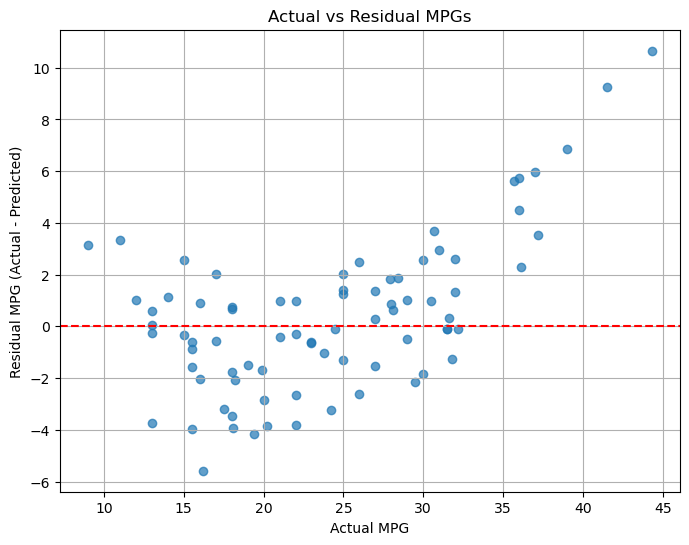

In [22]:
# Let's begin with calculating the residual values (actual - predicted) for MPG
residuals = comparisonDf['Actual MPG'] - comparisonDf['Predicted MPG']

# And now let's graph the residual values for our target 'MPG'
plt.figure(figsize=(8,6))

# Set the chart type to a scatterplot with the '.scatter()' function, to visualize the difference between actual (x-axis) vs residual (actual-predicted) MPG values (y-axis)
plt.scatter(comparisonDf['Actual MPG'], residuals, alpha=0.7)

# Add a horizontal, and dashed, red line across the graph at y = 0 to indicate where there would be 'no error' in predictions - if a value falls here it was exact.
plt.axhline(y=0, color='red', linestyle='--')

# Set the x-axis label with the '.xlabel()' function to 'Actual MPG'
plt.xlabel('Actual MPG')

# Set the y-axis label with the '.ylabel()' function to 'Residual MPG (Actual - Predicted)'
plt.ylabel('Residual MPG (Actual - Predicted)')

# Set the title of the graph with the '.title()' function to 'Actual vs Residual MPG'
plt.title('Actual vs Residual MPGs')

# Enable a grid on the plot to improve readability with the '.grid(True)' function 
plt.grid(True)

# Display the residuals graph with the '.show()' function
plt.show()

**<span style="color:Orange; font-size:18px;">Saving our predictions:</span>**
- Now let's **save our new predictions to a .csv file** for quick and easy access

In [23]:
# Use the "try" flow control argument to "try" and save the final output to a CSV
try:
    # Round our output to two decimal places, for cleanliness
    comparisonDf['Predicted MPG'] = comparisonDf['Predicted MPG'].astype(float).round(2)

    # Save our actual vs predicted MPG values to a .csv
    comparisonDf.to_csv('Auto MPG Predictions.csv', index=False, float_format='%.2f')

    # Print out a verification line for our user
    print('Final dataset exported to CSV.' + '\n')

    # Now display the data for easy viewing
    display(comparisonDf)

# Handle any errors (Exceptions) that occur during the .CSV export process with our generic error variable 'ex'
except Exception as ex:
    # Print a generic error message for our user
    print("Error occurred while saving the final output to CSV: " + str(ex))

Final dataset exported to CSV.



,Car Name,Model Year,Origin,Cylinders,Displacement,Horsepower,Weight,Acceleration,Actual MPG,Predicted MPG
0,chevrolet chevelle malibu,70,1,8,307.00,130,3504,12.00,18.00,NaN
1,buick skylark 320,70,1,8,350.00,165,3693,11.50,15.00,NaN
2,plymouth satellite,70,1,8,318.00,150,3436,11.00,18.00,NaN
3,amc rebel sst,70,1,8,304.00,150,3433,12.00,16.00,NaN
4,ford torino,70,1,8,302.00,140,3449,10.50,17.00,14.97
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,82,1,4,140.00,86,2790,15.60,27.00,NaN
394,vw pickup,82,1,4,97.00,52,2130,24.60,44.00,NaN
395,dodge rampage,82,1,4,135.00,84,2295,11.60,32.00,NaN
396,ford ranger,82,3,4,120.00,79,2625,18.60,28.00,NaN


**<span style="color:Blue; font-size:18px;">Final Thoughts:</span>**
- Our **Linear Regression model performed well on both the training and testing datasets**, showing **good generalization** without significant overfitting

- Our evalutation graphs showed that **actual and predicted values were closely aligned**, and **our residual was not super high**

- **RMSE** (root mean squared error - square root of the MSE) shows that our **predictions are off from the actual/target by approximately 3-4 MPG, on average**

This indicates that the **model is** pretty **reliable** and **performs consistently** across unseen data

- Since **Linear Regression is relatively simple**, its **interpretability** and **efficiency** make it a **strong baseline model**. 

With **feature engineering, or regularization** this **model could be further optimized** for improved accuracy.